Notebook to visualise the output of scalar_comparison (not used in thesis)

In [1]:
data_file_location = "../data/output/scalar_comparison(normalized).csv"

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import nltk
from nltk.corpus import wordnet as wn

from operations.composition import *
from operations.similarity_measures import *
from operations.logical_negation import *
from operations.worldly_context_creation import *
from operations.helpers import *

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import MaxNLocator


import pickle
import csv
import random


from matplotlib.lines import Line2D 
from matplotlib.ticker import MaxNLocator

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/benjaminrodatz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
file = []
df = None

with open(data_file_location, newline='') as csvfile:
        # with open('df_i4_all_idneg.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            test = row
            file.append(row)

        df = pd.DataFrame(file[1:])
        df.columns = file[0]


In [4]:
# convert the rows after row 5 to numeric.
# It is assumed that these only contain numbers which can then be compared to the human rating.
# This cell prints all rows which have been found and will eventually be compared to the human rating.

df["MEANRATING"] = pd.to_numeric(df["MEANRATING"])
for col in df.columns[5:]:
    print(col)
    df[col] = pd.to_numeric(df[col])
    


4_negated_0.8_trace
4_negated_0.8_kE1
4_negated_0.8_kE2
4_negated_0.8_khyp1
4_negated_0.8_khyp2
4_negated_hyp_0.8_trace
4_negated_hyp_0.8_kE1
4_negated_hyp_0.8_kE2
4_negated_hyp_0.8_khyp1
4_negated_hyp_0.8_khyp2
4_wc_minus_hyp_0.8_trace
4_wc_minus_hyp_0.8_kE1
4_wc_minus_hyp_0.8_kE2
4_wc_minus_hyp_0.8_khyp1
4_wc_minus_hyp_0.8_khyp2
4_context_minus_hyp_0.8_trace
4_context_minus_hyp_0.8_kE1
4_context_minus_hyp_0.8_kE2
4_context_minus_hyp_0.8_khyp1
4_context_minus_hyp_0.8_khyp2
4_negated_1_trace
4_negated_1_kE1
4_negated_1_kE2
4_negated_1_khyp1
4_negated_1_khyp2
4_negated_hyp_1_trace
4_negated_hyp_1_kE1
4_negated_hyp_1_kE2
4_negated_hyp_1_khyp1
4_negated_hyp_1_khyp2
4_wc_minus_hyp_1_trace
4_wc_minus_hyp_1_kE1
4_wc_minus_hyp_1_kE2
4_wc_minus_hyp_1_khyp1
4_wc_minus_hyp_1_khyp2
4_context_minus_hyp_1_trace
4_context_minus_hyp_1_kE1
4_context_minus_hyp_1_kE2
4_context_minus_hyp_1_khyp1
4_context_minus_hyp_1_khyp2
4_negated_0.6_trace
4_negated_0.6_kE1
4_negated_0.6_kE2
4_negated_0.6_khyp1
4_nega

In [5]:
extracted = pd.DataFrame(columns = ["framework", "similarity", "scalar", "value"])
# extracted.columns = 

extracted.head()



counter = 1
for col in df.columns[5:]:
    string = col.split("_")

    name = ""
    for st in string[1:-2]:
        name += st
        
    score = df[[col]].corrwith(df["MEANRATING"])
    extracted.at[counter] = [name, string[-1], string[-2], score[0]]
    counter += 1

extracted['scalar'] = pd.to_numeric(extracted['scalar'])
extracted


,framework,similarity,scalar,value
1,negated,trace,0.8,0.627006
2,negated,kE1,0.8,0.59951
3,negated,kE2,0.8,0.439626
4,negated,khyp1,0.8,0.360464
5,negated,khyp2,0.8,0.291038
...,...,...,...,...
116,contextminushyp,trace,0.0,0.628083
117,contextminushyp,kE1,0.0,0.599057
118,contextminushyp,kE2,0.0,0.44037
119,contextminushyp,khyp1,0.0,0.475429


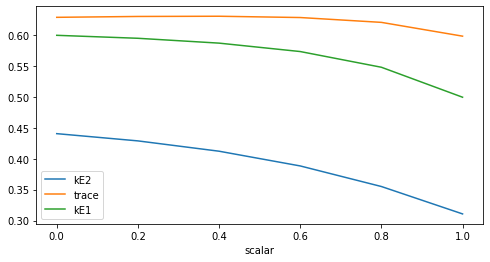

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

similarities = {
                'trace', 
                'kE1', 
                'kE2', 
#                 'khyp1', 
#                 'khyp2'
}

for sim in similarities:
    extracted[(extracted['framework'] == 'contextminushyp') & (extracted['similarity'] == sim)].sort_values(by='scalar').plot(ax = ax, x='scalar', 
                  y='value', label=sim)
